### Censo Adultos

#### 1.- Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

#### 2.- Carga y dimensión de datos

In [2]:
df_train = pd.read_csv('train_adultos.csv',sep=',')

In [3]:
df_train.shape

(32561, 15)

In [4]:
df_train.columns

Index(['age', 'work-class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Edad: este atributo nos informa sobre la edad de cualquier individuo. Es un atributo numérico con valores continuos, y dado que es una variable de intervalo donde la medición cero indica que no hay edad / cero.

WorkClass: este atributo nos informa sobre la clase de trabajo individual de cualquier individuo. Es un atributo categórico, con diferentes valores como privado, gobierno federal, gobierno local, gobierno estatal, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Educación: este atributo nos informa sobre el nivel educativo más alto de cualquier individuo. Es un atributo categórico, con diferentes valores como Bachillerato, Preescolar, Maestría, Doctorado, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Education-num: este atributo es una representación numérica del atributo de educación, que indica el nivel educativo más alto de cualquier individuo. Cuanto mayor sea el valor, mayor será el nivel educativo. Es un atributo ordinal ya que cada valor es distinto y tiene cierto orden, cuanto mayor sea el valor, mayor será el nivel educativo.

Estado civil: este atributo nos informa sobre el estado civil de un individuo. Es un atributo categórico, con diferentes valores como Casado-civil-cónyuge, Divorciado, Nunca casado, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Ocupación: este atributo nos informa sobre el campo de ocupación de un individuo. Es un atributo categórico, con diferentes valores como soporte técnico, reparación de artesanía, ventas, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Relación: este atributo nos informa sobre la relación del individuo en una familia. Es un atributo categórico, con diferentes valores como esposa, esposo, soltero, etc. Es un atributo nominal, ya que cada valor es distinto y tiene algún significado.

Raza: este atributo nos informa sobre la raza de un individuo. Es un atributo categórico, con diferentes valores como Blanco, Negro, Asiático-Pac-Islander, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Sexo: este atributo nos informa sobre el sexo / género de un individuo. Es un atributo categórico, con dos valores Masculino, Femenino. Es un atributo nominal ya que cada valor es distinto y tiene algún significado asociado.

Ganancia de capital: este atributo nos dice la ganancia / ingreso de fuentes de inversión distintas al salario. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que no hay ganancia de capital.

Pérdida de capital: este atributo nos dice la pérdida de fuentes de inversión distintas al salario. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que no hay pérdida de capital.

Horas por semana: este atributo nos dice la cantidad de horas que un individuo trabaja por semana. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que la persona no trabaja.

País nativo: este atributo nos informa sobre el país nativo / país de origen de un individuo. Es un atributo categórico con valores como Estados Unidos, India, Inglaterra, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Ingresos: este atributo nos informa sobre los ingresos de un individuo, ya sea menor que 50k o mayor que 50k. Es un valor categórico y un atributo nominal.

El enunciado del problema es predecir si el ingreso excede los 50 mil al año o no en función de los datos del censo

In [5]:
df_train.head(3)

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
df_train['income'].unique()

array(['<=50K', '>50K'], dtype=object)

La varibables income es nuestra variable target por lo cual la cambiaremos por 0 y 1 para facilitar el análisis

In [7]:
df_train['income'] = df_train['income'].replace(['<=50K'],'0')
df_train['income'] = df_train['income'].replace(['>50K'],'1')
df_train['income'] = df_train['income'].astype('int')

In [8]:
df_train.drop(['fnlwgt'], axis=1, inplace=True)
df_train.head(3)

,age,work-class,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


#### 3.- Entendimiento de datos

##### 3.1.- Valores nulos

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [10]:
df_train.isna().sum()

age                  0
work-class        1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Existen valores nules en las variables: Work-class, Occupatión y Native Country pero que no representán más del 6% del total de datos, igualmente analizaremos los campos nulos por si existe alguna relación entre las variables.

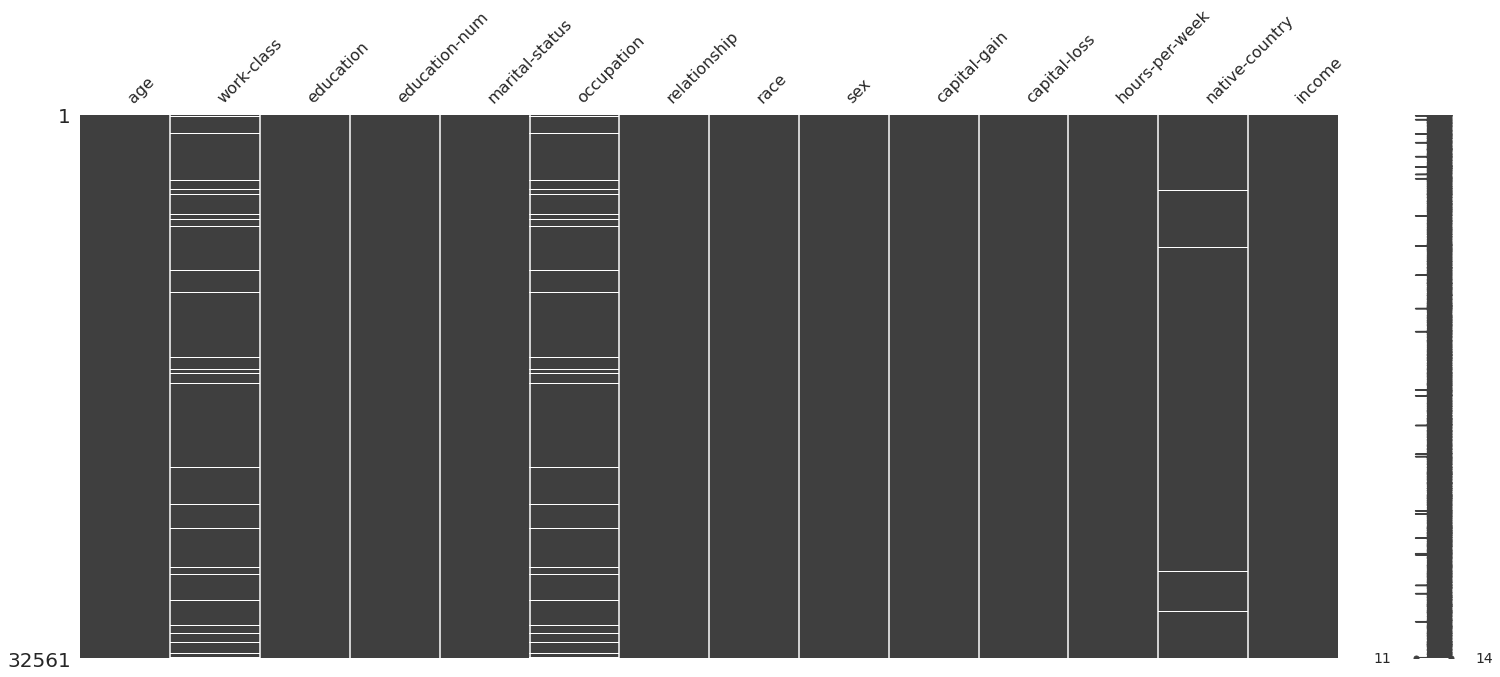

In [11]:
import missingno as msno
msno.matrix(df_train)

Podemos ver que en los casos donde figura un valor nulo en "Work Class", también se da para "Occupation", por lo que nos dice que la persona encuestada no tiene ocupación ni trabajo actual.

El campo de "Native Country" si parece un caso aislado.

##### 3.2.- Variable Target

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<bound method Series.sort_index of 0    24720
1     7841
Name: income, dtype: int64>

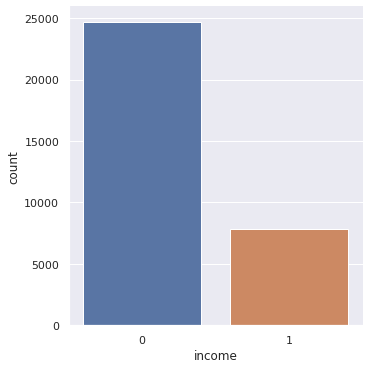

In [12]:
sns.factorplot('income',data=df_train,kind="count")
df_train['income'].value_counts().sort_index

Aproximadamente el 24% de personas encuestadas tiene un saldo por encima de los 50K mil dólares.

##### 3.3.- Variables cuantitativas

##### 3.3.1.- Medidas Estadísticas

In [13]:
df_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


Analizamos las variables numéricas donde podemos observar que existen posibles valores atípicos en gran medida son "Capital-gain" y "Capital-loss" y en menor medida en "Age" y "Hours-per-week".

In [14]:
Variables = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

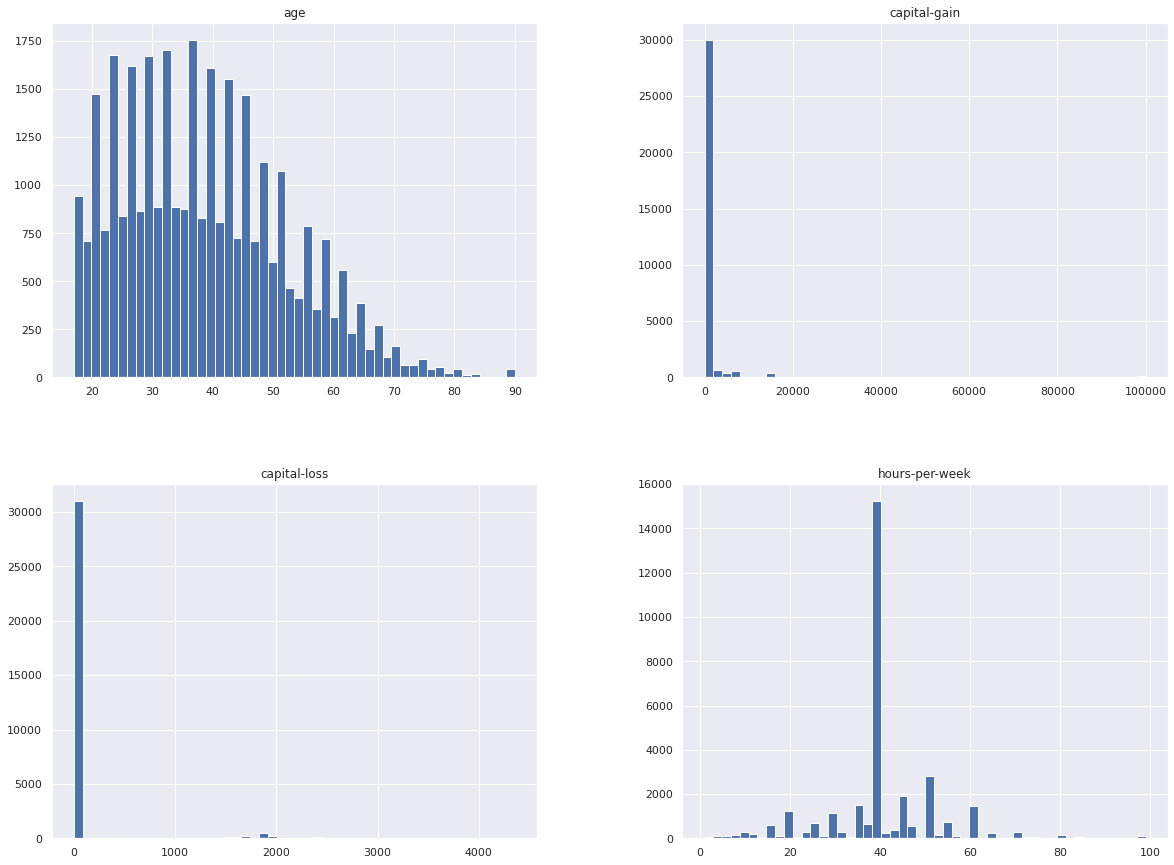

In [15]:
df_train[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

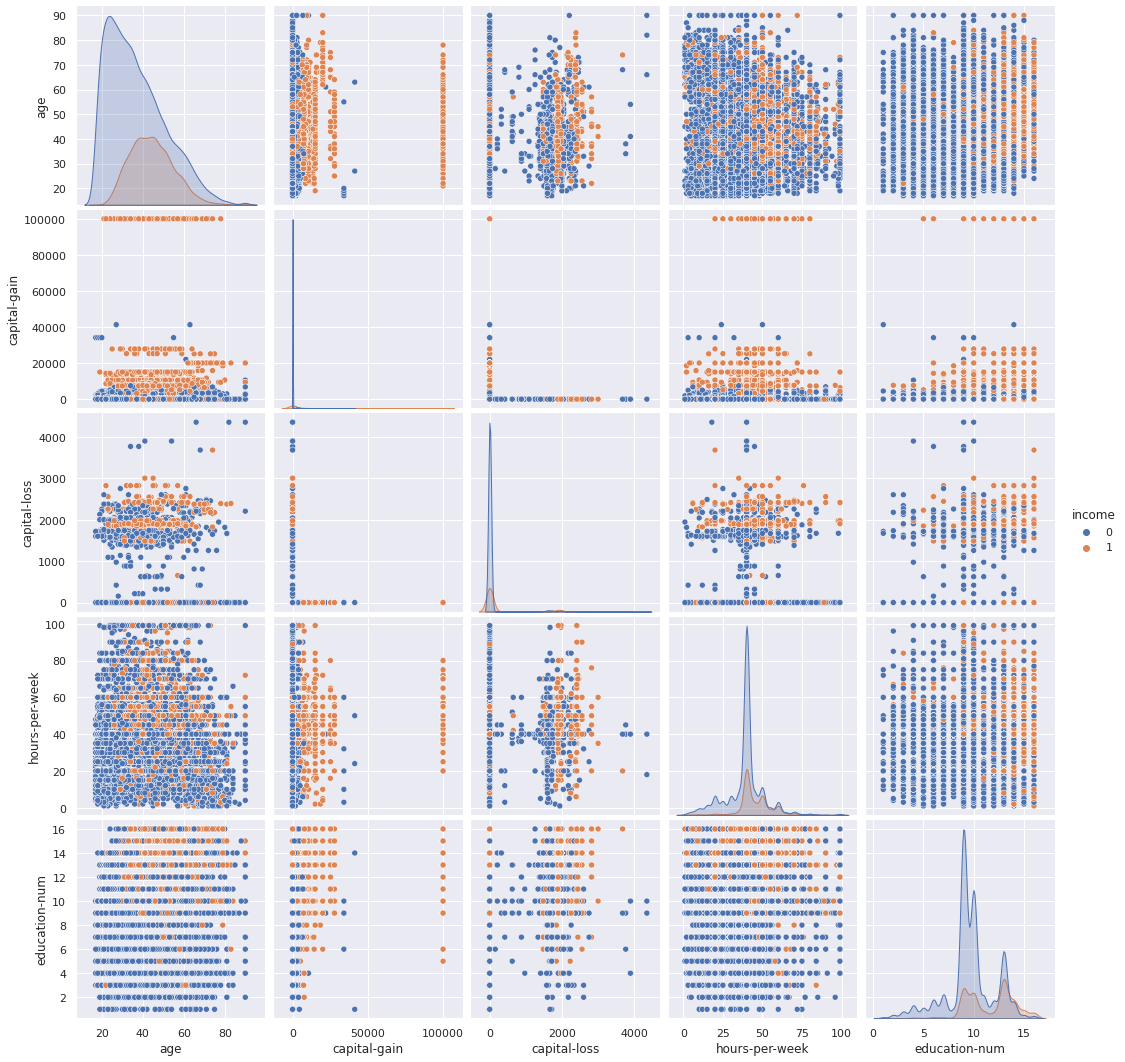

In [16]:
Variables = ['age', 'capital-gain', 'capital-loss', 'hours-per-week','education-num','income']
sns.pairplot(df_train[Variables], height=3, diag_kind = 'kde', hue='income')

Cruzamos las variables numéricas entre ellas y adiconalmente agregamos el Target para conocer la distribución y comenzar a generar hipótesis de variables que discriminan mejor a ambos grupos (Mayor y menor sueldo a 50K).

##### 3.3.2.- Correlaciones

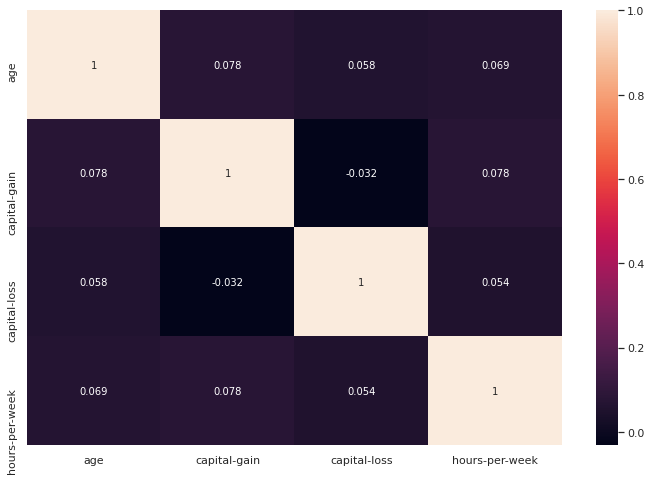

In [17]:
corr = df_train[['age', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

La correlación se encuentra ente -0.1 y 0.1, muy cercano a 0 por lo que podemos decir que no presentan relación lineal entre ellas.

##### 3.4.- Variables cualitativas

Obtendremos las variables cualitativas para conocer su distribución y su relación con la variable "Target".

In [21]:
categorical_attributes = df_train.select_dtypes(include=['object'])

In [22]:
categorical_attributes.dtypes

work-class        object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object

##### 3.4.1.- Work Class (Tipo de Trabajo)

<bound method Series.sort_index of Private             0.738682
Self-emp-not-inc    0.082701
Local-gov           0.068120
State-gov           0.042246
Self-emp-inc        0.036322
Federal-gov         0.031245
Without-pay         0.000456
Never-worked        0.000228
Name: work-class, dtype: float64>

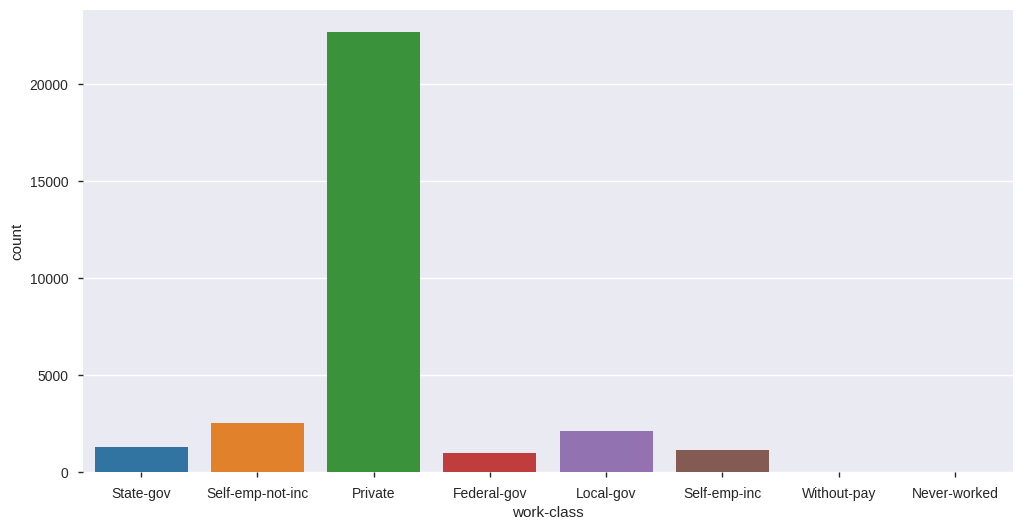

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")
df_train['work-class'].value_counts(1).sort_index

El tipo de trabajo "Private" tiene el 74% de casos del total de observaciones.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


income                
                  count   sum      mean
work-class                             
Federal-gov         960   371  0.386458
Local-gov          2093   617  0.294792
Never-worked          7     0  0.000000
Private           22696  4963  0.218673
Self-emp-inc       1116   622  0.557348
Self-emp-not-inc   2541   724  0.284927
State-gov          1298   353  0.271957
Without-pay          14     0  0.000000

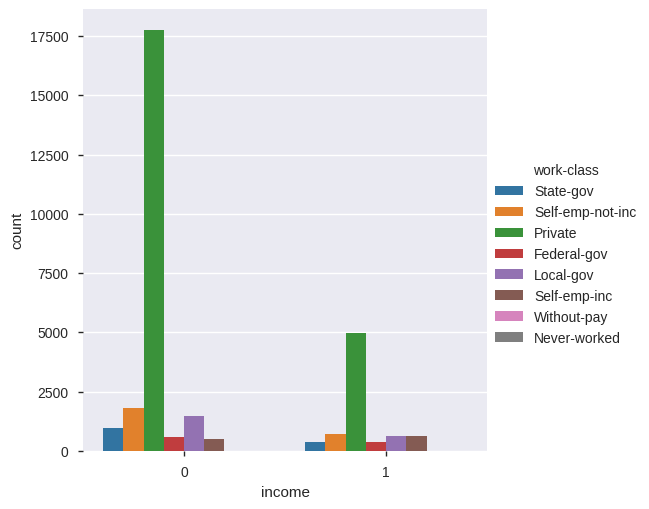

In [24]:
sns.factorplot('income',data=df_train,hue='work-class',kind="count")
df_train[['work-class', 'income']].groupby(['work-class'], as_index=False).agg(['count','sum','mean'])

Los segmentos de "Work-Class" con mayor proporción de salarios mayor a 50K (1) es en "Self-emp-inc" y "Federal-gov".

##### 3.4.2.- Education (Educación)

<bound method Series.sort_index of HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64>

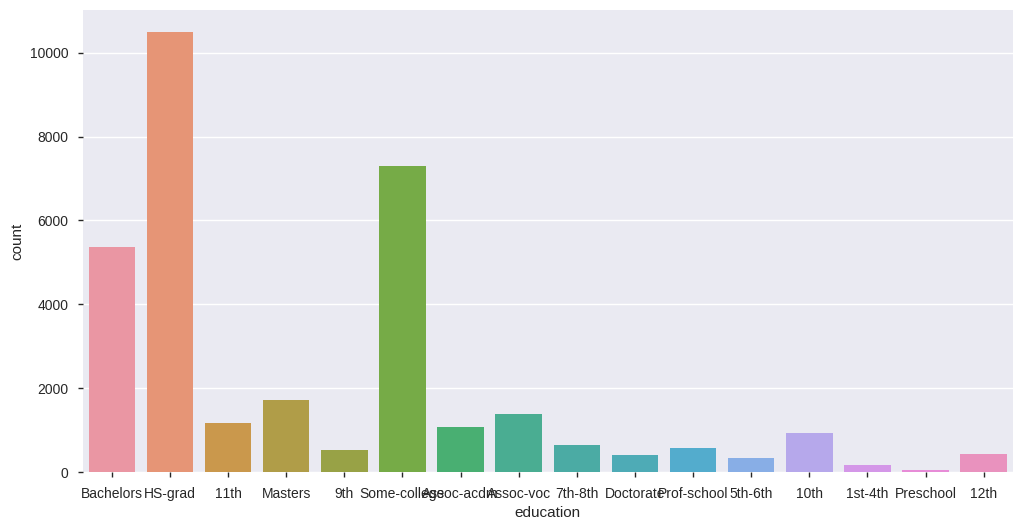

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "education")
df_train['education'].value_counts(1).sort_index

El nivel de educación "HS-grad" cuenta con el 32% de observaciones, seguido con "Some-Collegue" con 22% aprox.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


income                
              count   sum      mean
education                          
10th            933    62  0.066452
11th           1175    60  0.051064
12th            433    33  0.076212
1st-4th         168     6  0.035714
5th-6th         333    16  0.048048
7th-8th         646    40  0.061920
9th             514    27  0.052529
Assoc-acdm     1067   265  0.248360
Assoc-voc      1382   361  0.261216
Bachelors      5355  2221  0.414753
Doctorate       413   306  0.740920
HS-grad       10501  1675  0.159509
Masters        1723   959  0.556587
Preschool        51     0  0.000000
Prof-school     576   423  0.734375
Some-college   7291  1387  0.190235

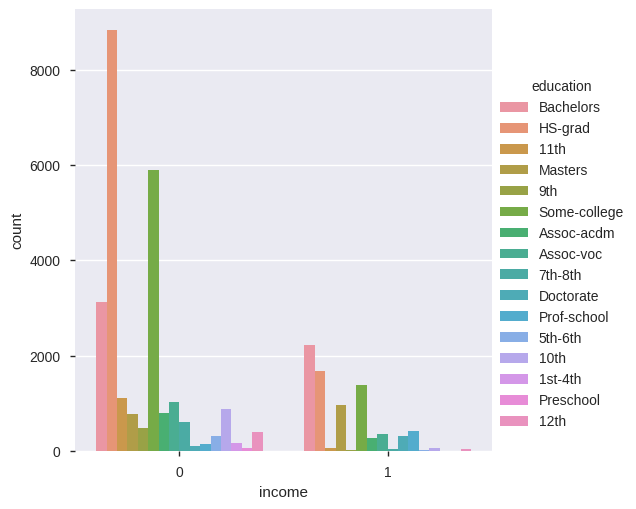

In [26]:
sns.factorplot('income',data=df_train,hue='education',kind="count")
df_train[['education', 'income']].groupby(['education'], as_index=False).agg(['count','sum','mean'])

Los niveles de "Education" con mayor proporción de salarios mayor a 50K (1) son "Prof-school", "Masters" y "Bachelors".

##### 3.4.3.- Sex (Género)

<bound method Series.sort_index of Male      0.669205
Female    0.330795
Name: sex, dtype: float64>

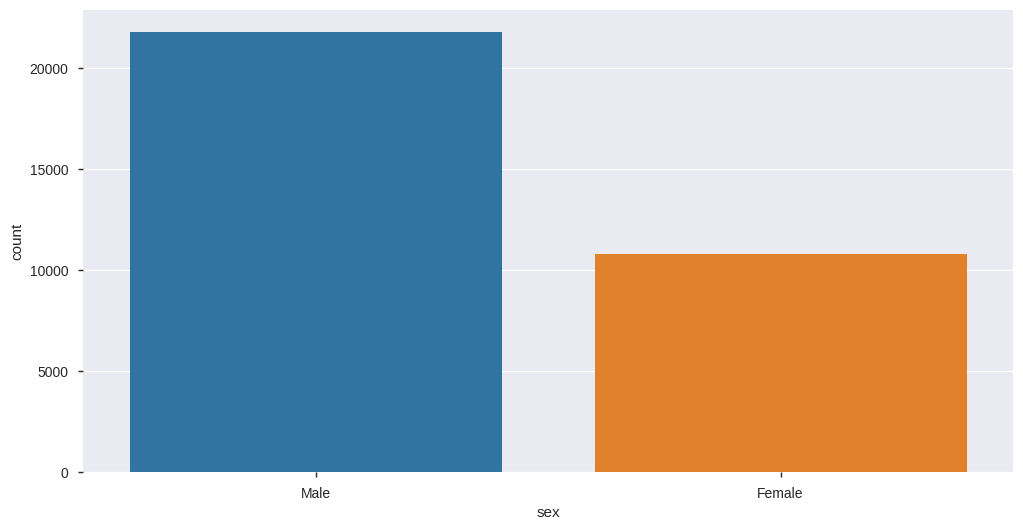

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "sex")
df_train['sex'].value_counts(1).sort_index

El género Masculino cuenta con el 67% de personas, es decir 2 de cada 3 personas son masculinos.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


income                
        count   sum      mean
sex                          
Female  10771  1179  0.109461
Male    21790  6662  0.305737

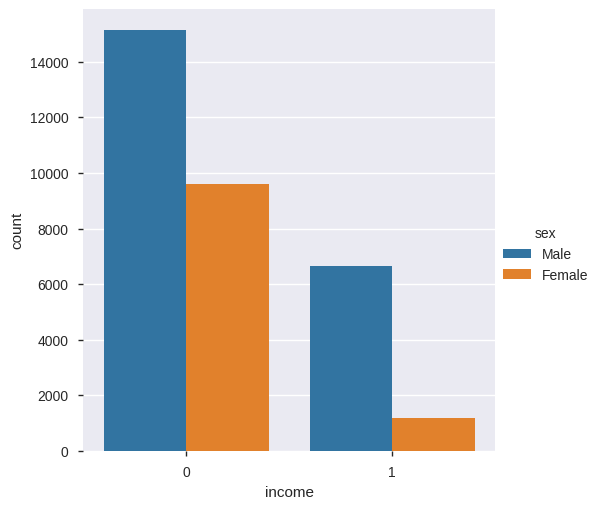

In [28]:
sns.factorplot('income',data=df_train,hue='sex',kind="count")
df_train[['sex', 'income']].groupby(['sex'], as_index=False).agg(['count','sum','mean'])

El género Masculino tiene mayor proporción de salarios mayor a 50K (1) respecto al género femenino (30% vs 11%).